# Ensemble Learning Workbook

In [1]:
%pylab inline
import numpy as np
import sklearn as sk

Populating the interactive namespace from numpy and matplotlib


In [2]:
""" Import digits dataset. """
# http://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html
from sklearn.datasets import load_digits
digits = load_digits()

In [3]:
def convert_features_used_to_image_locations(features_used, clf):
    features_used_as_image = np.zeros(64)
    for f in features_used:
        features_used_as_image[f] += 1
    features_used_as_image = features_used_as_image.reshape((8,8))
    locations_of_decision_points = np.argwhere(features_used_as_image > 0)
    return [features_used_as_image, locations_of_decision_points]


In [4]:
def plot_decision_points_on_image(ax, features_used_as_image, locations_of_decision_points):
    [ax.plot(x,y,'r*', ms=15*features_used_as_image[x,y]) for [x,y] in locations_of_decision_points]

# Random Forests

Generally speaking, a random forest is an ensmble learner where the weak learners are decision trees.

Original paper on decision trees:  [Ho, 1995](http://ieeexplore.ieee.org/xpl/login.jsp?arnumber=598994) ([pdf](ftp://cm.bell-labs.com/who/tkh/papers/odt.pdf))

Python's scikit-learn includes most of what we discussed pre-made in its [ensemble](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble) library.

Classes to run [Boosting (via AdaBoost)](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier) and [Bagging](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html#sklearn.ensemble.BaggingClassifier) on arbitrary classifiers are given.
However, we will be focusing particularly on a few of the random forest functions given in that sklearn library.


### Bagging

In [5]:
""" Random forests made of bagged decision trees. """
# http://scikit-learn.org/stable/modules/ensemble.html#forests-of-randomized-trees

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10, max_depth=2, n_jobs=-1)
clf = clf.fit(digits.data, digits.target)
score = clf.score(digits.data, digits.target)

In [7]:
""" Pull out decision boundaries from all contained trees. """
features_used_as_image = np.zeros((8,8))
locations_of_decision_points = []

for est in clf.estimators_:  #for each weak learner
    features_used_in_this_tree = [f for f in est.tree_.feature if f != -2]
    [features_used_as_image_in_this_tree, locations_of_decision_points_in_this_tree] = \
        convert_features_used_to_image_locations(features_used_in_this_tree, est)
    features_used_as_image += features_used_as_image_in_this_tree
    locations_of_decision_points += list(locations_of_decision_points_in_this_tree)

locations_of_decision_points = list(set([tuple(c) for c in locations_of_decision_points]))
print(locations_of_decision_points)

[(0, 1), (3, 2), (3, 5), (5, 5), (4, 6), (6, 6), (4, 4), (5, 2), (4, 2), (2, 1), (7, 4), (0, 5), (3, 6), (3, 4), (5, 1), (2, 5), (4, 1), (5, 3)]


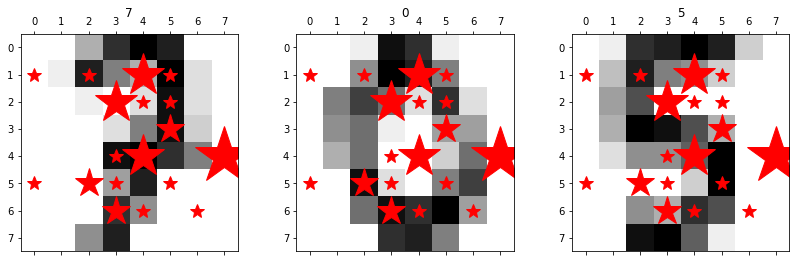

In [8]:
""" Plot 3 random digits, with decision boundaries labeled using ensemble learner. """

N = len(digits.data)
samples_to_show = np.random.randint(0,N,3)
f, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)
f.set_figwidth(14)
ax1.set_title(digits.target[samples_to_show[0]])
ax1.matshow(digits.images[samples_to_show[0]], cmap=cm.gray_r)
plot_decision_points_on_image(ax1, features_used_as_image, locations_of_decision_points)

ax2.set_title(digits.target[samples_to_show[1]])
ax2.matshow(digits.images[samples_to_show[1]], cmap=cm.gray_r)
plot_decision_points_on_image(ax2, features_used_as_image, locations_of_decision_points)

ax3.set_title(digits.target[samples_to_show[2]])
ax3.matshow(digits.images[samples_to_show[2]], cmap=cm.gray_r)
plot_decision_points_on_image(ax3, features_used_as_image, locations_of_decision_points)

### Boosting

1 0.4056761268781302
2 0.45742904841402343
3 0.5386755703951029
4 0.6427378964941569
5 0.7134112409571508
6 0.7746243739565943
7 0.7902058987200891
8 0.8208124652198109
9 0.832498608792432
10 0.8430717863105175
11 0.852531997774068
12 0.845854201446856
13 0.8530884808013356
14 0.862548692264886
15 0.8280467445742905
16 0.7835281023928771
17 0.7200890372843628
18 0.6983861992209237
19 0.6800222593210907
20 0.5342237061769616
21 0.15748469671675014
22 0.15748469671675014
23 0.15748469671675014
24 0.15748469671675014


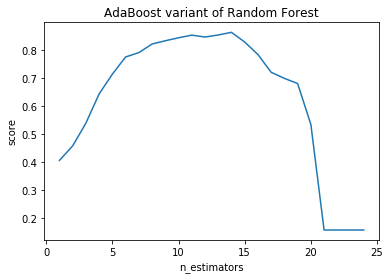

In [10]:
""" Boosing """
# http://scikit-learn.org/stable/modules/ensemble.html#gradient-tree-boosting
from sklearn.ensemble import GradientBoostingClassifier

scores = []
list_of_n_estimators = range(1,25)
for n in list_of_n_estimators: # for n_estimators in [1:15]
    temp_scores = []
    for i in range(5):  # repeat this 5 times
        clf = GradientBoostingClassifier(n_estimators=n, learning_rate=0.9,
            max_depth=2, random_state=0, max_features=3).fit(digits.data, digits.target)
        score = clf.score(digits.data, digits.target)
        temp_scores.append(score)
    avg_score = float(sum(temp_scores))/len(temp_scores)
    scores.append(avg_score)
    print(n, avg_score)
    

plot(list_of_n_estimators, scores)
xlabel("n_estimators")
ylabel("score")
title("AdaBoost variant of Random Forest")

# Regarding learning rate:  http://scikit-learn.org/stable/modules/ensemble.html#gradient-boosting-shrinkage


In [13]:
from time import time

scores = []
list_of_n_estimators = range(1,25)
for n in list_of_n_estimators: # for n_estimators in [1:15]
    temp_scores = []
    t0 = time()
    for i in range(5):  # repeat this 5 times
        clf = GradientBoostingClassifier(n_estimators=n, learning_rate=0.9,
            max_depth=2, random_state=0, max_features=3).fit(digits.data, digits.target)
        score = clf.score(digits.data, digits.target)
        temp_scores.append(score)
    t1 = time()
    avg_score = float(sum(temp_scores))/len(temp_scores)
    avg_time = float((t1-t0)/5.)
    scores.append(avg_score)
    print(n, avg_score, avg_time)

    
# plot(list_of_n_estimators, scores)
# xlabel("n_estimators")
# ylabel("score")
# title("AdaBoost variant of Random Forest")

# Regarding learning rate:  http://scikit-learn.org/stable/modules/ensemble.html#gradient-boosting-shrinkage



1 0.4056761268781302 0.022871017456054688
2 0.45742904841402343 0.03555798530578613
3 0.5386755703951029 0.04630222320556641
4 0.6427378964941569 0.06624460220336914
5 0.7134112409571508 0.0771681785583496
6 0.7746243739565943 0.08902244567871094
7 0.7902058987200891 0.09484543800354003
8 0.8208124652198109 0.11441316604614257
9 0.832498608792432 0.12434940338134766
10 0.8430717863105175 0.14284076690673828
11 0.852531997774068 0.15402259826660156
12 0.845854201446856 0.1751081943511963
13 0.8530884808013356 0.17764039039611818
14 0.862548692264886 0.19650883674621583
15 0.8280467445742905 0.2232151985168457
16 0.7835281023928771 0.21546835899353028
17 0.7200890372843628 0.23210639953613282
18 0.6983861992209237 0.2531804084777832
19 0.6800222593210907 0.2619309902191162
20 0.5342237061769616 0.2732351779937744
21 0.15748469671675014 0.33205361366271974
22 0.15748469671675014 0.3007554054260254
23 0.15748469671675014 0.3131204128265381
24 0.15748469671675014 0.3267890453338623
[0.02739

sklearn on selecting the number of boosting iterations using [out-of-bag estimates](# regarding selection of number of iterations: 
http://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_oob.html#example-ensemble-plot-gradient-boosting-oob-py)

In [18]:
# Challenge: Add the time it takes to train and test a learner to the previous "n_estimators vs score" graph
# Play with the 'max features' in a similar way.  (i.e., look for a good value for it)
# What are the parameters of the best GradientBoostingClassifier you can make? 
#   (and did you split your data into train and test sets?)

In [19]:
# Graph the effect the number of estimators has on performance where n_estimators is in [1,50]

In [20]:
# Explore the relation between n_estimators and learning_rate

In [21]:
# Pick a good set of paramters (n_estimators, learning_rate, max_depth)

## Other Variants and Final Challenges:

In [22]:
# As in Ho 1995, add processed features and re-train a learner of your choice.

In [23]:
# Train/test split.  (careful so all classes are represented in both data sets)

In [24]:
""" Very random trees.  (even the decisions are random)"""
# http://scikit-learn.org/stable/modules/ensemble.html#extremely-randomized-trees
# Get ExtraTreesClassifier working on digits dataset.  Pick some good parameters

' Very random trees.  (even the decisions are random)'

In [25]:
# Compare performance of ExtraTreesClassifier to RandomForestClassifier

In [27]:
""" Play with AdaBoost or Bagging objects directly """
# if you aren't already, switch over to using the AdaBoost or Bagging Classifiers given in sklearn.ensemble to create a forest.
# Then use this framework to drop in a different classifier as a weak learner and compare your new predictor to your old random forest

' Play with AdaBoost or Bagging objects directly '

## Other Datasets:
* "the" MNIST [handwritten digits dataset](http://yann.lecun.com/exdb/mnist/)
* [Housing Prices](http://www.cs.toronto.edu/~delve/data/census-house/desc.html)